In [1]:
import numpy as np
import pandas as pd
import matplotlib
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('2018.csv')
fea = data.iloc[:, 1:-1]
y = data['result']
features = fea.columns
X = data[features]

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)

In [4]:
features_scaled = ['Attr12', 'Attr11', 'Attr15', 'Attr14', 'Attr5', 'Attr4', 'Attr6', 'Attr9','Attr10', 'Attr1']
X_scaled = fea[features_scaled]
X_train_scaled = X_train[features_scaled]
X_test_scaled = X_test[features_scaled]

In [5]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score

No feature selection

KNN

In [6]:
tuned_parameters1 = [{'n_neighbors':range(5,50,5),
                     'leaf_size':range(10,100,10), 
                    'weights':['uniform', 'distance']}
                    ]

In [7]:
from sklearn.neighbors import KNeighborsClassifier
clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters1, cv=10,
                   scoring='f1_macro')
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)

print("Accuracy:",accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

print()

Best parameters set found on development set:
{'leaf_size': 10, 'n_neighbors': 15, 'weights': 'distance'}

Grid scores on development set:

0.496 (+/-0.225) for {'leaf_size': 10, 'n_neighbors': 5, 'weights': 'uniform'}
0.517 (+/-0.195) for {'leaf_size': 10, 'n_neighbors': 5, 'weights': 'distance'}
0.495 (+/-0.205) for {'leaf_size': 10, 'n_neighbors': 10, 'weights': 'uniform'}
0.518 (+/-0.236) for {'leaf_size': 10, 'n_neighbors': 10, 'weights': 'distance'}
0.512 (+/-0.229) for {'leaf_size': 10, 'n_neighbors': 15, 'weights': 'uniform'}
0.551 (+/-0.242) for {'leaf_size': 10, 'n_neighbors': 15, 'weights': 'distance'}
0.485 (+/-0.190) for {'leaf_size': 10, 'n_neighbors': 20, 'weights': 'uniform'}
0.489 (+/-0.182) for {'leaf_size': 10, 'n_neighbors': 20, 'weights': 'distance'}
0.468 (+/-0.155) for {'leaf_size': 10, 'n_neighbors': 25, 'weights': 'uniform'}
0.467 (+/-0.151) for {'leaf_size': 10, 'n_neighbors': 25, 'weights': 'distance'}
0.449 (+/-0.140) for {'leaf_size': 10, 'n_neighbors': 30,

LR

In [8]:
tuned_parameters2 = [{'solver':['liblinear', 'lbfgs','newton-cg','sag'],
                     'multi_class':['ovr']},
                    {'solver':[ 'lbfgs','newton-cg','sag'],
                     'multi_class':['multinomial']}
                    ]

In [9]:
from sklearn.linear_model import LogisticRegression 
clf = GridSearchCV(LogisticRegression(penalty = 'l2'), tuned_parameters2, cv=10,
                   scoring='f1_macro')
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)

print("Accuracy:",accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

print()

Best parameters set found on development set:
{'multi_class': 'multinomial', 'solver': 'lbfgs'}

Grid scores on development set:

0.491 (+/-0.229) for {'multi_class': 'ovr', 'solver': 'liblinear'}
0.490 (+/-0.220) for {'multi_class': 'ovr', 'solver': 'lbfgs'}
0.490 (+/-0.220) for {'multi_class': 'ovr', 'solver': 'newton-cg'}
0.478 (+/-0.213) for {'multi_class': 'ovr', 'solver': 'sag'}
0.494 (+/-0.254) for {'multi_class': 'multinomial', 'solver': 'lbfgs'}
0.475 (+/-0.225) for {'multi_class': 'multinomial', 'solver': 'newton-cg'}
0.479 (+/-0.223) for {'multi_class': 'multinomial', 'solver': 'sag'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

Accuracy: 0.8297872340425532
              precision    recall  f1-score   support

           1       0.85      0.95      0.90        66
           2       0.75      0.52      0.62        23
           3       0.75      0.60      0.67         5

    accuracy 

Random Foreset

In [10]:
tuned_parameters3 = [{'n_estimators':range(2,10),
                     'max_features':range(1,15,1), 
                    'min_samples_leaf':range(1,50)}
                    ]

In [11]:
from sklearn.ensemble import RandomForestClassifier 
clf = GridSearchCV(RandomForestClassifier() , tuned_parameters3, cv=10,
                   scoring='f1_macro')
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)

print("Accuracy:",accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

print()

Best parameters set found on development set:
{'max_features': 14, 'min_samples_leaf': 10, 'n_estimators': 6}

Grid scores on development set:

0.440 (+/-0.219) for {'max_features': 1, 'min_samples_leaf': 1, 'n_estimators': 2}
0.468 (+/-0.221) for {'max_features': 1, 'min_samples_leaf': 1, 'n_estimators': 3}
0.481 (+/-0.267) for {'max_features': 1, 'min_samples_leaf': 1, 'n_estimators': 4}
0.484 (+/-0.264) for {'max_features': 1, 'min_samples_leaf': 1, 'n_estimators': 5}
0.466 (+/-0.256) for {'max_features': 1, 'min_samples_leaf': 1, 'n_estimators': 6}
0.447 (+/-0.178) for {'max_features': 1, 'min_samples_leaf': 1, 'n_estimators': 7}
0.519 (+/-0.213) for {'max_features': 1, 'min_samples_leaf': 1, 'n_estimators': 8}
0.499 (+/-0.129) for {'max_features': 1, 'min_samples_leaf': 1, 'n_estimators': 9}
0.448 (+/-0.240) for {'max_features': 1, 'min_samples_leaf': 2, 'n_estimators': 2}
0.490 (+/-0.147) for {'max_features': 1, 'min_samples_leaf': 2, 'n_estimators': 3}
0.504 (+/-0.201) for {'max

0.519 (+/-0.194) for {'max_features': 9, 'min_samples_leaf': 13, 'n_estimators': 5}
0.581 (+/-0.273) for {'max_features': 9, 'min_samples_leaf': 13, 'n_estimators': 6}
0.556 (+/-0.239) for {'max_features': 9, 'min_samples_leaf': 13, 'n_estimators': 7}
0.538 (+/-0.224) for {'max_features': 9, 'min_samples_leaf': 13, 'n_estimators': 8}
0.519 (+/-0.135) for {'max_features': 9, 'min_samples_leaf': 13, 'n_estimators': 9}
0.550 (+/-0.261) for {'max_features': 9, 'min_samples_leaf': 14, 'n_estimators': 2}
0.548 (+/-0.196) for {'max_features': 9, 'min_samples_leaf': 14, 'n_estimators': 3}
0.582 (+/-0.255) for {'max_features': 9, 'min_samples_leaf': 14, 'n_estimators': 4}
0.518 (+/-0.156) for {'max_features': 9, 'min_samples_leaf': 14, 'n_estimators': 5}
0.529 (+/-0.131) for {'max_features': 9, 'min_samples_leaf': 14, 'n_estimators': 6}
0.534 (+/-0.206) for {'max_features': 9, 'min_samples_leaf': 14, 'n_estimators': 7}
0.506 (+/-0.151) for {'max_features': 9, 'min_samples_leaf': 14, 'n_estimato

Decision Tree

In [12]:
tuned_parameters4 = [{'criterion':['gini', 'entropy'],
                     'splitter':['best', 'random'], 
                    'max_features':['auto', 'log2', 'sqrt'],
                    'max_depth':range(10,100)}
                    ]

In [13]:
from sklearn import tree 
clf = GridSearchCV(tree.DecisionTreeClassifier(class_weight = 'balanced') , tuned_parameters4, cv=10,
                   scoring='f1_macro')
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)

print("Accuracy:",accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

print()

Best parameters set found on development set:
{'criterion': 'entropy', 'max_depth': 18, 'max_features': 'log2', 'splitter': 'best'}

Grid scores on development set:

0.502 (+/-0.243) for {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'splitter': 'best'}
0.504 (+/-0.198) for {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'splitter': 'random'}
0.453 (+/-0.173) for {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'splitter': 'best'}
0.527 (+/-0.245) for {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'splitter': 'random'}
0.522 (+/-0.269) for {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'splitter': 'best'}
0.438 (+/-0.267) for {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'splitter': 'random'}
0.480 (+/-0.240) for {'criterion': 'gini', 'max_depth': 11, 'max_features': 'auto', 'splitter': 'best'}
0.487 (+/-0.184) for {'criterion': 'gini', 'max_depth': 11, 'max_features': 'auto', 'splitter': 'ran

AdaBoost

In [14]:
tuned_parameters5 = [{'n_estimators':range(2,50),
                     'learning_rate':[1,1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10], 
                    'algorithm':['SAMME', 'SAMME.R']}
                    ]

In [15]:
from sklearn.ensemble import  AdaBoostClassifier
clf = GridSearchCV(AdaBoostClassifier(), tuned_parameters5, cv=10,
                   scoring='f1_macro')
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)

print("Accuracy:",accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

print()

Best parameters set found on development set:
{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 18}

Grid scores on development set:

0.482 (+/-0.167) for {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 2}
0.499 (+/-0.171) for {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 3}
0.517 (+/-0.142) for {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 4}
0.541 (+/-0.242) for {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 5}
0.529 (+/-0.203) for {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 6}
0.565 (+/-0.249) for {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 7}
0.588 (+/-0.273) for {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 8}
0.542 (+/-0.192) for {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 9}
0.561 (+/-0.241) for {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 10}
0.557 (+/-0.272) for {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 11}
0.566 (+/-0.305) for {'al

Gaussian Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB 
clf = GaussianNB()
clf.fit(X_train, y_train)
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)

print("Accuracy:",accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

print()


Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

Accuracy: 0.8085106382978723
              precision    recall  f1-score   support

           1       0.87      0.89      0.88        66
           2       0.80      0.52      0.63        23
           3       0.50      1.00      0.67         5
           4       0.00      0.00      0.00         0

    accuracy                           0.81        94
   macro avg       0.54      0.60      0.54        94
weighted avg       0.83      0.81      0.81        94




SVM

In [17]:
tuned_parameters7 = [{'kernel': ['rbf'], 'gamma': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10],
                     'C': [1,5,10,20,50,100,200,300,400,500,600,700,800,900,1000],
                    'max_iter': [1,100,200,300,400,500,600,700,800,900,1000]},
                    {'kernel': ['linear'], 'C': [1,5,10,20,50,100,200,300,400,500,600,700,800,900,1000]}]

In [18]:
from sklearn.svm import SVC
clf = GridSearchCV(SVC(), tuned_parameters7, cv=10,
                   scoring='f1_macro')
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)

print("Accuracy:",accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

print()

Best parameters set found on development set:
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': 700}

Grid scores on development set:

0.263 (+/-0.180) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 1}
0.526 (+/-0.213) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 100}
0.526 (+/-0.213) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 200}
0.526 (+/-0.213) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 300}
0.526 (+/-0.213) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 400}
0.526 (+/-0.213) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 500}
0.526 (+/-0.213) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 600}
0.526 (+/-0.213) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 700}
0.526 (+/-0.213) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 800}
0.526 (+/-0.213) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 900}
0.526 (+/-0.213) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 1000}
0.2

With feature selection

KNN

In [19]:
tuned_parametersa = [{'n_neighbors':range(5,50,5),
                     'leaf_size':range(10,100,10), 
                    'weights':['uniform', 'distance']}
                    ]

In [20]:
clf = GridSearchCV(KNeighborsClassifier(), tuned_parametersa, cv=10,
                   scoring='f1_macro')
clf.fit(X_train_scaled, y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test_scaled)

print("Accuracy:",accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

print()

Best parameters set found on development set:
{'leaf_size': 50, 'n_neighbors': 5, 'weights': 'distance'}

Grid scores on development set:

0.568 (+/-0.205) for {'leaf_size': 10, 'n_neighbors': 5, 'weights': 'uniform'}
0.590 (+/-0.207) for {'leaf_size': 10, 'n_neighbors': 5, 'weights': 'distance'}
0.482 (+/-0.135) for {'leaf_size': 10, 'n_neighbors': 10, 'weights': 'uniform'}
0.532 (+/-0.166) for {'leaf_size': 10, 'n_neighbors': 10, 'weights': 'distance'}
0.497 (+/-0.130) for {'leaf_size': 10, 'n_neighbors': 15, 'weights': 'uniform'}
0.522 (+/-0.194) for {'leaf_size': 10, 'n_neighbors': 15, 'weights': 'distance'}
0.488 (+/-0.142) for {'leaf_size': 10, 'n_neighbors': 20, 'weights': 'uniform'}
0.495 (+/-0.142) for {'leaf_size': 10, 'n_neighbors': 20, 'weights': 'distance'}
0.479 (+/-0.138) for {'leaf_size': 10, 'n_neighbors': 25, 'weights': 'uniform'}
0.496 (+/-0.152) for {'leaf_size': 10, 'n_neighbors': 25, 'weights': 'distance'}
0.474 (+/-0.171) for {'leaf_size': 10, 'n_neighbors': 30, 

LR

In [21]:
tuned_parametersb = [{'solver':['liblinear', 'lbfgs','newton-cg','sag'],
                     'multi_class':['ovr']},
                    {'solver':[ 'lbfgs','newton-cg','sag'],
                     'multi_class':['multinomial']}
                    ]

In [22]:
clf = GridSearchCV(LogisticRegression(penalty = 'l2'), tuned_parametersb, cv=10,
                   scoring='f1_macro')
clf.fit(X_train_scaled, y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test_scaled)

print("Accuracy:",accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

print()

Best parameters set found on development set:
{'multi_class': 'multinomial', 'solver': 'sag'}

Grid scores on development set:

0.509 (+/-0.286) for {'multi_class': 'ovr', 'solver': 'liblinear'}
0.496 (+/-0.244) for {'multi_class': 'ovr', 'solver': 'lbfgs'}
0.496 (+/-0.244) for {'multi_class': 'ovr', 'solver': 'newton-cg'}
0.496 (+/-0.244) for {'multi_class': 'ovr', 'solver': 'sag'}
0.504 (+/-0.201) for {'multi_class': 'multinomial', 'solver': 'lbfgs'}
0.506 (+/-0.197) for {'multi_class': 'multinomial', 'solver': 'newton-cg'}
0.518 (+/-0.241) for {'multi_class': 'multinomial', 'solver': 'sag'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

Accuracy: 0.8617021276595744
              precision    recall  f1-score   support

           1       0.87      0.98      0.92        66
           2       0.81      0.57      0.67        23
           3       1.00      0.60      0.75         5

    accuracy   

Random Forest

In [23]:
tuned_parametersc = [{'n_estimators':range(5,50,5),
                     'max_features':range(1,10,1), 
                    'min_samples_leaf':range(1,50)}
                    ]

In [24]:
clf = GridSearchCV(RandomForestClassifier() , tuned_parametersc, cv=10,
                   scoring='f1_macro')
clf.fit(X_train_scaled, y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test_scaled)

print("Accuracy:",accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

print()

Best parameters set found on development set:
{'max_features': 9, 'min_samples_leaf': 5, 'n_estimators': 20}

Grid scores on development set:

0.517 (+/-0.255) for {'max_features': 1, 'min_samples_leaf': 1, 'n_estimators': 5}
0.485 (+/-0.156) for {'max_features': 1, 'min_samples_leaf': 1, 'n_estimators': 10}
0.484 (+/-0.124) for {'max_features': 1, 'min_samples_leaf': 1, 'n_estimators': 15}
0.501 (+/-0.164) for {'max_features': 1, 'min_samples_leaf': 1, 'n_estimators': 20}
0.524 (+/-0.119) for {'max_features': 1, 'min_samples_leaf': 1, 'n_estimators': 25}
0.532 (+/-0.131) for {'max_features': 1, 'min_samples_leaf': 1, 'n_estimators': 30}
0.524 (+/-0.127) for {'max_features': 1, 'min_samples_leaf': 1, 'n_estimators': 35}
0.498 (+/-0.151) for {'max_features': 1, 'min_samples_leaf': 1, 'n_estimators': 40}
0.536 (+/-0.101) for {'max_features': 1, 'min_samples_leaf': 1, 'n_estimators': 45}
0.514 (+/-0.266) for {'max_features': 1, 'min_samples_leaf': 2, 'n_estimators': 5}
0.493 (+/-0.136) fo

0.562 (+/-0.210) for {'max_features': 9, 'min_samples_leaf': 11, 'n_estimators': 25}
0.562 (+/-0.264) for {'max_features': 9, 'min_samples_leaf': 11, 'n_estimators': 30}
0.564 (+/-0.222) for {'max_features': 9, 'min_samples_leaf': 11, 'n_estimators': 35}
0.609 (+/-0.247) for {'max_features': 9, 'min_samples_leaf': 11, 'n_estimators': 40}
0.584 (+/-0.172) for {'max_features': 9, 'min_samples_leaf': 11, 'n_estimators': 45}
0.581 (+/-0.297) for {'max_features': 9, 'min_samples_leaf': 12, 'n_estimators': 5}
0.570 (+/-0.265) for {'max_features': 9, 'min_samples_leaf': 12, 'n_estimators': 10}
0.562 (+/-0.280) for {'max_features': 9, 'min_samples_leaf': 12, 'n_estimators': 15}
0.579 (+/-0.255) for {'max_features': 9, 'min_samples_leaf': 12, 'n_estimators': 20}
0.538 (+/-0.117) for {'max_features': 9, 'min_samples_leaf': 12, 'n_estimators': 25}
0.583 (+/-0.246) for {'max_features': 9, 'min_samples_leaf': 12, 'n_estimators': 30}
0.590 (+/-0.196) for {'max_features': 9, 'min_samples_leaf': 12, '

Decision Tree

In [25]:
tuned_parametersd = [{'criterion':['gini', 'entropy'],
                     'splitter':['best', 'random'], 
                    'max_features':['auto', 'log2', 'sqrt'],
                    'max_depth':range(10,100)}
                    ]

In [26]:
clf = GridSearchCV(tree.DecisionTreeClassifier(class_weight = 'balanced') , tuned_parametersd, cv=10,
                   scoring='f1_macro')
clf.fit(X_train_scaled, y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test_scaled)

print("Accuracy:",accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

print()

Best parameters set found on development set:
{'criterion': 'gini', 'max_depth': 76, 'max_features': 'log2', 'splitter': 'best'}

Grid scores on development set:

0.499 (+/-0.238) for {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'splitter': 'best'}
0.449 (+/-0.178) for {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'splitter': 'random'}
0.463 (+/-0.197) for {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'splitter': 'best'}
0.475 (+/-0.213) for {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'splitter': 'random'}
0.487 (+/-0.232) for {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'splitter': 'best'}
0.494 (+/-0.267) for {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'splitter': 'random'}
0.496 (+/-0.225) for {'criterion': 'gini', 'max_depth': 11, 'max_features': 'auto', 'splitter': 'best'}
0.553 (+/-0.212) for {'criterion': 'gini', 'max_depth': 11, 'max_features': 'auto', 'splitter': 'random

AdaBoost

In [27]:
tuned_parameterse = [{'n_estimators':range(2,50),
                     'learning_rate':[1,1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10], 
                    'algorithm':['SAMME', 'SAMME.R']}
                    ]

In [28]:
clf = GridSearchCV(AdaBoostClassifier(), tuned_parameterse, cv=10,
                   scoring='f1_macro')
clf.fit(X_train_scaled, y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test_scaled)

print("Accuracy:",accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

print()

Best parameters set found on development set:
{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 20}

Grid scores on development set:

0.482 (+/-0.167) for {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 2}
0.499 (+/-0.171) for {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 3}
0.500 (+/-0.125) for {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 4}
0.548 (+/-0.283) for {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 5}
0.515 (+/-0.177) for {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 6}
0.500 (+/-0.136) for {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 7}
0.515 (+/-0.216) for {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 8}
0.545 (+/-0.237) for {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 9}
0.515 (+/-0.109) for {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 10}
0.565 (+/-0.249) for {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 11}
0.597 (+/-0.284) for {'al

Gaussian Naive Bayes

In [29]:
clf = GaussianNB()
clf.fit(X_train_scaled, y_train)
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test_scaled)

print("Accuracy:",accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

print()


Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

Accuracy: 0.8085106382978723
              precision    recall  f1-score   support

           1       0.89      0.94      0.91        66
           2       0.72      0.57      0.63        23
           3       0.33      0.20      0.25         5
           4       0.00      0.00      0.00         0

    accuracy                           0.81        94
   macro avg       0.49      0.43      0.45        94
weighted avg       0.82      0.81      0.81        94




SVM

In [30]:
tuned_parametersg = [{'kernel': ['rbf'], 'gamma': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10],
                     'C': [1,5,10,20,50,100,200,300,400,500,600,700,800,900,1000],
                    'max_iter': [1,100,200,300,400,500,600,700,800,900,1000]},
                    {'kernel': ['linear'], 'C': [1,5,10,20,50,100,200,300,400,500,600,700,800,900,1000]}]

In [31]:
clf = GridSearchCV(SVC(), tuned_parametersg, cv=10,
                   scoring='f1_macro')
clf.fit(X_train_scaled, y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test_scaled)

print("Accuracy:",accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

print()

Best parameters set found on development set:
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 100}

Grid scores on development set:

0.232 (+/-0.092) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 1}
0.558 (+/-0.208) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 100}
0.558 (+/-0.208) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 200}
0.558 (+/-0.208) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 300}
0.558 (+/-0.208) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 400}
0.558 (+/-0.208) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 500}
0.558 (+/-0.208) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 600}
0.558 (+/-0.208) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 700}
0.558 (+/-0.208) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 800}
0.558 (+/-0.208) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 900}
0.558 (+/-0.208) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 1000}
0.27

ROC curve

In [32]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']

In [33]:
y_test_bi = label_binarize(y_test, classes=[1,2,3,4])
n_classes = y_test_bi.shape[1]

without feature selection

In [51]:
clf = KNeighborsClassifier(leaf_size = 10, n_neighbors = 15, weights = 'distance')
y_score1 = clf.fit(X_train, y_train).predict_proba(X_test)
fpr1 = dict()
tpr1 = dict()
roc_auc1 = dict()
for i in range(n_classes):
    fpr1[i], tpr1[i], _ = roc_curve(y_test_bi[:, i], y_score1[:, i])
    roc_auc1[i] = auc(fpr1[i], tpr1[i])
fpr1["micro"], tpr1["micro"], _ = roc_curve(y_test_bi.ravel(), y_score1.ravel())
roc_auc1["micro"] = auc(fpr1["micro"], tpr1["micro"])

In [52]:
clf = LogisticRegression(penalty='l2', multi_class = 'multinomial', solver = 'lbfgs')
y_score2 = clf.fit(X_train, y_train).predict_proba(X_test)
fpr2 = dict()
tpr2 = dict()
roc_auc2 = dict()
for i in range(n_classes):
    fpr2[i], tpr2[i], _ = roc_curve(y_test_bi[:, i], y_score2[:, i])
    roc_auc2[i] = auc(fpr2[i], tpr2[i])
fpr2["micro"], tpr2["micro"], _ = roc_curve(y_test_bi.ravel(), y_score2.ravel())
roc_auc2["micro"] = auc(fpr2["micro"], tpr2["micro"])

In [53]:
clf = RandomForestClassifier(max_features = 14, min_samples_leaf = 10, n_estimators = 6)
y_score3 = clf.fit(X_train, y_train).predict_proba(X_test)
fpr3 = dict()
tpr3 = dict()
roc_auc3 = dict()
for i in range(n_classes):
    fpr3[i], tpr3[i], _ = roc_curve(y_test_bi[:, i], y_score3[:, i])
    roc_auc3[i] = auc(fpr3[i], tpr3[i])
fpr3["micro"], tpr3["micro"], _ = roc_curve(y_test_bi.ravel(), y_score3.ravel())
roc_auc3["micro"] = auc(fpr3["micro"], tpr3["micro"])

In [54]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 18, max_features = 'log2', splitter = 'best')
y_score4 = clf.fit(X_train, y_train).predict_proba(X_test)
fpr4 = dict()
tpr4 = dict()
roc_auc4 = dict()
for i in range(n_classes):
    fpr4[i], tpr4[i], _ = roc_curve(y_test_bi[:, i], y_score4[:, i])
    roc_auc4[i] = auc(fpr4[i], tpr4[i])
fpr4["micro"], tpr4["micro"], _ = roc_curve(y_test_bi.ravel(), y_score4.ravel())
roc_auc4["micro"] = auc(fpr4["micro"], tpr4["micro"])

In [55]:
clf = AdaBoostClassifier(algorithm = 'SAMME', learning_rate = 1, n_estimators = 18)
y_score5 = clf.fit(X_train, y_train).predict_proba(X_test)
fpr5 = dict()
tpr5 = dict()
roc_auc5 = dict()
for i in range(n_classes):
    fpr5[i], tpr5[i], _ = roc_curve(y_test_bi[:, i], y_score5[:, i])
    roc_auc5[i] = auc(fpr5[i], tpr5[i])
fpr5["micro"], tpr5["micro"], _ = roc_curve(y_test_bi.ravel(), y_score5.ravel())
roc_auc5["micro"] = auc(fpr5["micro"], tpr5["micro"])

In [56]:
clf = GaussianNB()
y_score6 = clf.fit(X_train, y_train).predict_proba(X_test)
fpr6 = dict()
tpr6 = dict()
roc_auc6 = dict()
for i in range(n_classes):
    fpr6[i], tpr6[i], _ = roc_curve(y_test_bi[:, i], y_score6[:, i])
    roc_auc6[i] = auc(fpr6[i], tpr6[i])
fpr6["micro"], tpr6["micro"], _ = roc_curve(y_test_bi.ravel(), y_score6.ravel())
roc_auc6["micro"] = auc(fpr6["micro"], tpr6["micro"])

In [57]:
clf = SVC(kernel='rbf', probability=True, C = 100, gamma = 0.01,  max_iter = 700)
y_score7 = clf.fit(X_train, y_train).predict_proba(X_test)
fpr7 = dict()
tpr7 = dict()
roc_auc7 = dict()
for i in range(n_classes):
    fpr7[i], tpr7[i], _ = roc_curve(y_test_bi[:, i], y_score7[:, i])
    roc_auc7[i] = auc(fpr7[i], tpr7[i])
fpr7["micro"], tpr7["micro"], _ = roc_curve(y_test_bi.ravel(), y_score7.ravel())
roc_auc7["micro"] = auc(fpr7["micro"], tpr7["micro"])

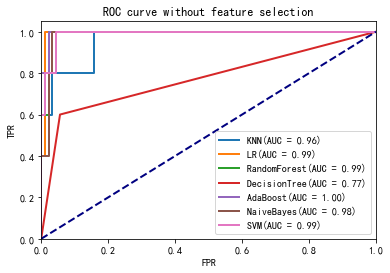

In [58]:
plt.figure()
lw = 2
plt.plot(fpr1[2], tpr1[2], lw=lw, label='KNN(AUC = %0.2f)' % roc_auc1[2])
plt.plot(fpr2[2], tpr2[2], lw=lw, label='LR(AUC = %0.2f)' % roc_auc2[2])
plt.plot(fpr3[2], tpr3[2], lw=lw, label='RandomForest(AUC = %0.2f)' % roc_auc3[2])
plt.plot(fpr4[2], tpr4[2], lw=lw, label='DecisionTree(AUC = %0.2f)' % roc_auc4[2])
plt.plot(fpr5[2], tpr5[2], lw=lw, label='AdaBoost(AUC = %0.2f)' % roc_auc5[2])
plt.plot(fpr6[2], tpr6[2], lw=lw, label='NaiveBayes(AUC = %0.2f)' % roc_auc6[2])
plt.plot(fpr7[2], tpr7[2], lw=lw, label='SVM(AUC = %0.2f)' % roc_auc7[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve without feature selection')
plt.legend(loc="lower right")
plt.show()

with feature selection

In [59]:
clf = KNeighborsClassifier(leaf_size = 50, n_neighbors = 5, weights = 'distance')
y_scorea = clf.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)
fpra = dict()
tpra = dict()
roc_auca = dict()
for i in range(n_classes):
    fpra[i], tpra[i], _ = roc_curve(y_test_bi[:, i], y_scorea[:, i])
    roc_auca[i] = auc(fpra[i], tpra[i])
fpra["micro"], tpra["micro"], _ = roc_curve(y_test_bi.ravel(), y_scorea.ravel())
roc_auca["micro"] = auc(fpra["micro"], tpra["micro"])

In [60]:
clf = LogisticRegression(penalty='l2', multi_class = 'multinomial', solver = 'sag')
y_scoreb = clf.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)
fprb = dict()
tprb = dict()
roc_aucb = dict()
for i in range(n_classes):
    fprb[i], tprb[i], _ = roc_curve(y_test_bi[:, i], y_scoreb[:, i])
    roc_aucb[i] = auc(fprb[i], tprb[i])
fprb["micro"], tprb["micro"], _ = roc_curve(y_test_bi.ravel(), y_scoreb.ravel())
roc_aucb["micro"] = auc(fprb["micro"], tprb["micro"])

In [61]:
clf = RandomForestClassifier(max_features = 9, min_samples_leaf = 5, n_estimators = 20)
y_scorec = clf.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)
fprc = dict()
tprc = dict()
roc_aucc = dict()
for i in range(n_classes):
    fprc[i], tprc[i], _ = roc_curve(y_test_bi[:, i], y_scorec[:, i])
    roc_aucc[i] = auc(fprc[i], tprc[i])
fprc["micro"], tprc["micro"], _ = roc_curve(y_test_bi.ravel(), y_scorec.ravel())
roc_aucc["micro"] = auc(fprc["micro"], tprc["micro"])

In [62]:
clf = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 76, max_features = 'log2', splitter = 'best')
y_scored = clf.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)
fprd = dict()
tprd = dict()
roc_aucd = dict()
for i in range(n_classes):
    fprd[i], tprd[i], _ = roc_curve(y_test_bi[:, i], y_scored[:, i])
    roc_aucd[i] = auc(fprd[i], tprd[i])
fprd["micro"], tprd["micro"], _ = roc_curve(y_test_bi.ravel(), y_scored.ravel())
roc_aucd["micro"] = auc(fprd["micro"], tprd["micro"])

In [63]:
clf = AdaBoostClassifier(algorithm = 'SAMME', learning_rate = 1, n_estimators = 20)
y_scoree = clf.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)
fpre = dict()
tpre = dict()
roc_auce = dict()
for i in range(n_classes):
    fpre[i], tpre[i], _ = roc_curve(y_test_bi[:, i], y_scoree[:, i])
    roc_auce[i] = auc(fpre[i], tpre[i])
fpre["micro"], tpre["micro"], _ = roc_curve(y_test_bi.ravel(), y_scoree.ravel())
roc_auce["micro"] = auc(fpre["micro"], tpre["micro"])

In [64]:
clf = GaussianNB()
y_scoref = clf.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)
fprf = dict()
tprf = dict()
roc_aucf = dict()
for i in range(n_classes):
    fprf[i], tprf[i], _ = roc_curve(y_test_bi[:, i], y_scoref[:, i])
    roc_aucf[i] = auc(fprf[i], tprf[i])
fprf["micro"], tprf["micro"], _ = roc_curve(y_test_bi.ravel(), y_scoref.ravel())
roc_aucf["micro"] = auc(fprf["micro"], tprf["micro"])

In [65]:
clf = SVC(probability=True, C = 100, gamma = 0.1, kernel = 'rbf', max_iter = 100)
y_scoreg = clf.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)
fprg = dict()
tprg = dict()
roc_aucg = dict()
for i in range(n_classes):
    fprg[i], tprg[i], _ = roc_curve(y_test_bi[:, i], y_scoreg[:, i])
    roc_aucg[i] = auc(fprg[i], tprg[i])
fprg["micro"], tprg["micro"], _ = roc_curve(y_test_bi.ravel(), y_scoreg.ravel())
roc_aucg["micro"] = auc(fprg["micro"], tprg["micro"])

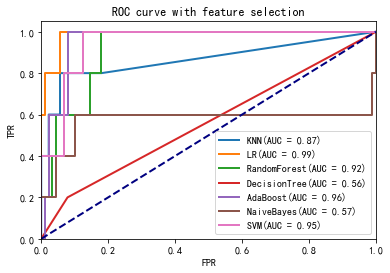

In [66]:
plt.figure()
lw = 2
plt.plot(fpra[2], tpra[2], lw=lw, label='KNN(AUC = %0.2f)' % roc_auca[2])
plt.plot(fprb[2], tprb[2], lw=lw, label='LR(AUC = %0.2f)' % roc_aucb[2])
plt.plot(fprc[2], tprc[2], lw=lw, label='RandomForest(AUC = %0.2f)' % roc_aucc[2])
plt.plot(fprd[2], tprd[2], lw=lw, label='DecisionTree(AUC = %0.2f)' % roc_aucd[2])
plt.plot(fpre[2], tpre[2], lw=lw, label='AdaBoost(AUC = %0.2f)' % roc_auce[2])
plt.plot(fprf[2], tprf[2], lw=lw, label='NaiveBayes(AUC = %0.2f)' % roc_aucf[2])
plt.plot(fprg[2], tprg[2], lw=lw, label='SVM(AUC = %0.2f)' % roc_aucg[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve with feature selection')
plt.legend(loc="lower right")
plt.show()